In [5]:
import pandas as pd

# Load the movie dataset
movie_df = pd.read_csv(r"TMDB 10000 Movies Dataset.csv")

# Check for missing values
print(movie_df.isnull().sum())

# Impute missing values in the 'overview' column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(movie_df[['overview']])
movie_df['overview'] = imputer.transform(movie_df[['overview']])

# Transform the 'original_language' column using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(movie_df['original_language'])
movie_df['original_language'] = le.transform(movie_df['original_language'])

# Transform the 'popularity' column using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(movie_df[['popularity']])
movie_df['popularity'] = scaler.transform(movie_df[['popularity']])

# Extract the release year from the 'release_date' column
movie_df['release_year'] = pd.DatetimeIndex(movie_df['release_date']).year

# Print the preprocessed dataset
print(movie_df.head(10))


id                   0
original_language    0
original_title       0
overview             6
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64
       id  original_language                original_title  \
0  851644                 24                       20세기 소녀   
1     238                  9                 The Godfather   
2     278                  9      The Shawshank Redemption   
3     240                  9         The Godfather Part II   
4  667257                 10              Cosas imposibles   
5   19404                 17  दिलवाले दुल्हनिया ले जायेंगे   
6     424                  9              Schindler's List   
7  620249                 43                         罗小黑战记   
8  372754                 22                           同級生   
9     129                 22                      千と千尋の神隠し   

                                            overview  popularity release_date  \
0  Yeon-du asks 

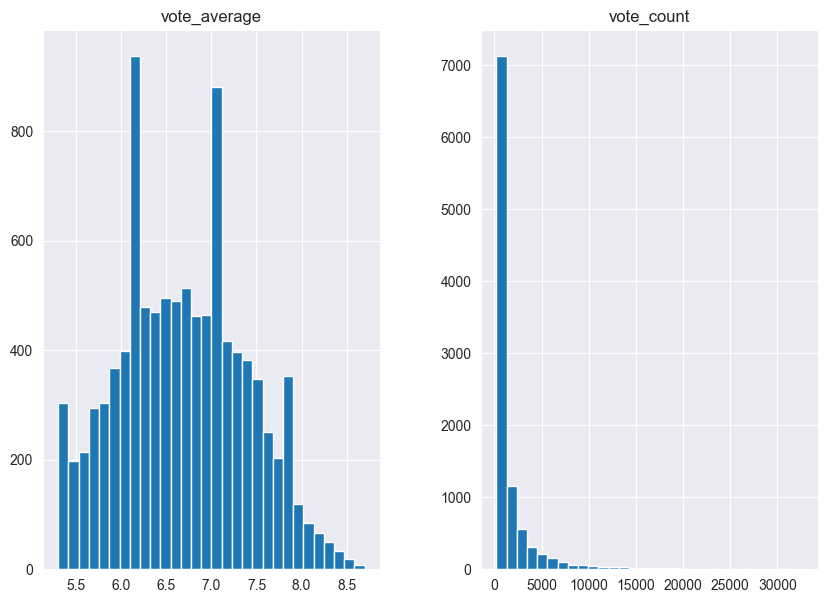

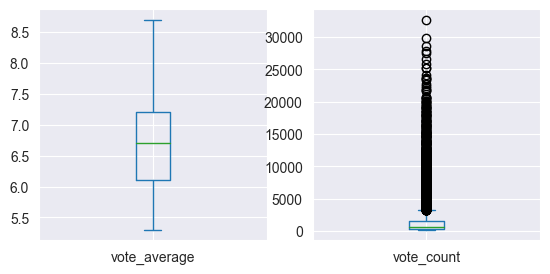

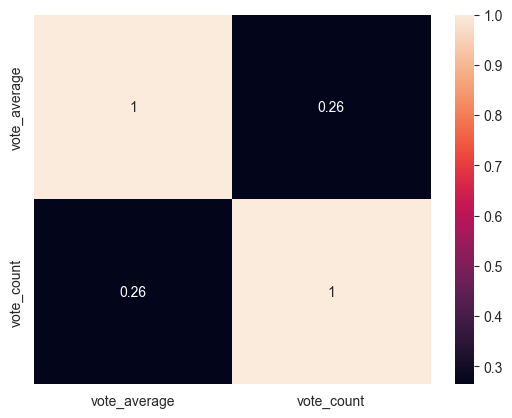

In [6]:
#eda
# Plot histograms of numerical features
numerical_features = ['vote_average', 'vote_count']
movie_df[numerical_features].hist(bins=30, figsize=(10,7))
plt.show()

# Plot box plots of numerical features
movie_df[numerical_features].plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False, figsize=(10,3))
plt.show()

# Calculate the correlation matrix of the numerical features
corr_matrix = movie_df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Select features with a correlation coefficient greater than 0.1 with the target variable
threshold = 0.1
important_features = corr_matrix[corr_matrix['vote_average'] > threshold].index
movie_df = movie_df[important_features]


In [9]:
# Rename the 'release_year' column to 'release_date'
movie_df.rename(columns={'release_year':'release_date'}, inplace=True)

# Display the first 5 rows of the updated DataFrame
print(movie_df.head())


   vote_average  vote_count
0           8.7         290
1           8.7       16988
2           8.7       22748
3           8.6       10293
4           8.6         299
